In [1]:
import akshare as ak

stock_individual_info_em_df = ak.stock_individual_info_em(symbol="000001")
print(stock_individual_info_em_df)

   item                value
0    最新                11.34
1  股票代码               000001
2  股票简称                 平安银行
3   总股本        19405918198.0
4   流通股        19405600653.0
5   总市值  220063112365.320007
6  流通市值  220059511405.019989
7    行业                   银行
8  上市时间             19910403


收盘 min:8.57
收盘 min index:45
收盘 min frame:日期       2017-05-08 00:00:00
股票代码                  000001
开盘                       8.6
收盘                      8.57
最高                      8.62
最低                      8.54
成交量                   460090
成交额              394424112.0
振幅                      0.93
涨跌幅                     -0.7
涨跌额                    -0.06
换手率                     0.27
year                    2017
month                      5
Name: 45, dtype: object
month close mean:month
1     14.467153
2     14.753793
3     13.448764
4     13.655159
5     13.308571
6     13.496224
7     13.376013
8     13.083694
9     13.459650
10    13.839746
11    13.951711
12    14.155461
Name: 收盘, dtype: float64


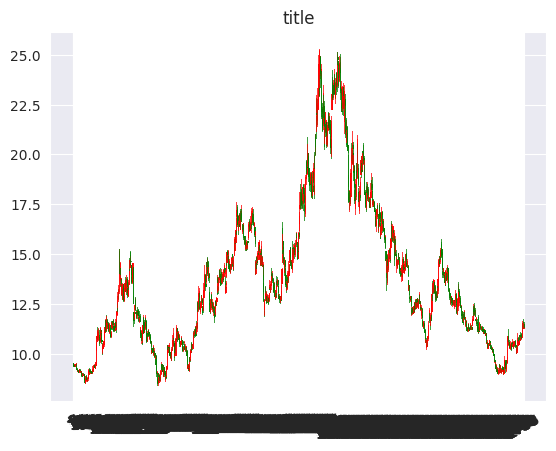

In [16]:
import akshare as ak
import pandas as pd
from mpl_finance import candlestick2_ochl
import mplfinance as mpf
import matplotlib.pyplot as plt

df = ak.stock_zh_a_hist(symbol="000001", period="daily", start_date="20170301", end_date='20240528', adjust="")
# print(df)
df.columns = ["日期", "股票代码", "开盘", "收盘", "最高", "最低", "成交量", "成交额", "振幅", "涨跌幅", "涨跌额", "换手率"]
df["日期"] = pd.to_datetime(df["日期"])
df["year"] = df["日期"].dt.year
df["month"] = df["日期"].dt.month
# print(df)
print("收盘 min:{}".format(df["收盘"].min()))
print("收盘 min index:{}".format(df["收盘"].idxmin()))
print("收盘 min frame:{}".format(df.loc[df["收盘"].idxmin()]))
print("month close mean:{}".format(df.groupby("month")["收盘"].mean()))

fig = plt.figure()
axes = fig.add_subplot(111)

candlestick2_ochl(
    ax=axes,
    opens=df["开盘"].values, closes=df["收盘"].values, highs=df["最高"].values, lows=df["最低"].values,
    width=0.75, colorup='red', colordown='green')
plt.xticks(range(len(df.index.values)), df.index.values, rotation=30)
axes.grid(True)
plt.title("title")
plt.show()
